# Camera Model And Augment Reality

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import ndarray

run this code to define `\bm` $\newcommand{\bm}{\boldsymbol}$

In [2]:
%matplotlib notebook

In [11]:
%matplotlib inline

###  4.1.1 Constructing rotation matrix using power series

<IPython.core.display.Javascript object>


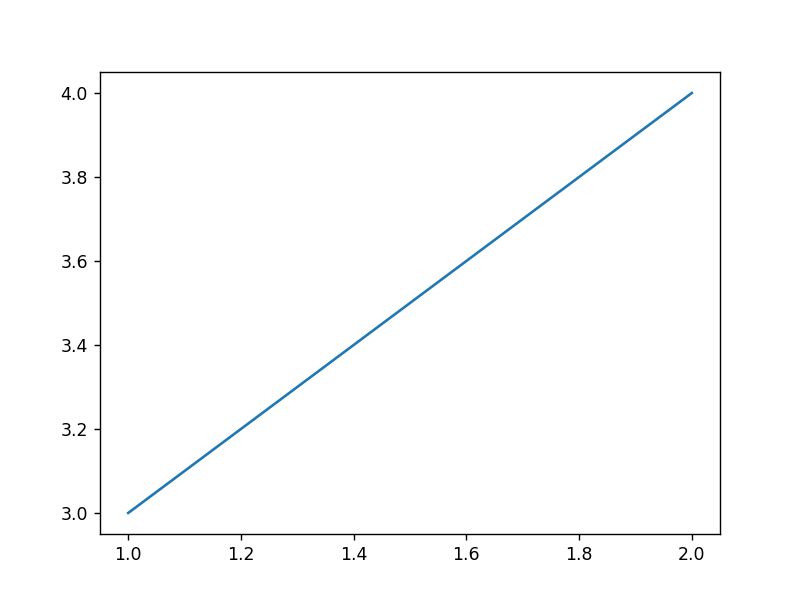

In [4]:
plt.plot([1,2],[3,4])
plt.show()

<IPython.core.display.Javascript object>


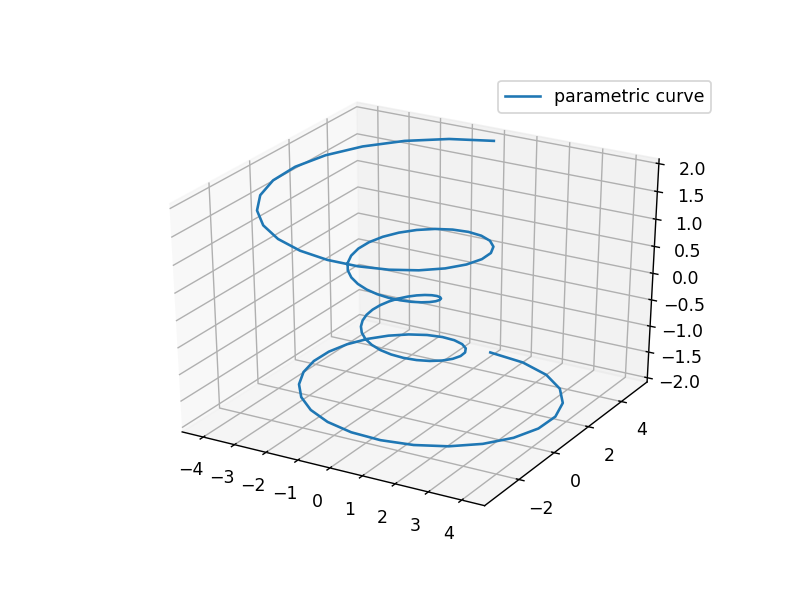

In [14]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [4]:
im=(np.random.rand(10,10,3)*255).astype('uint8')

<IPython.core.display.Javascript object>


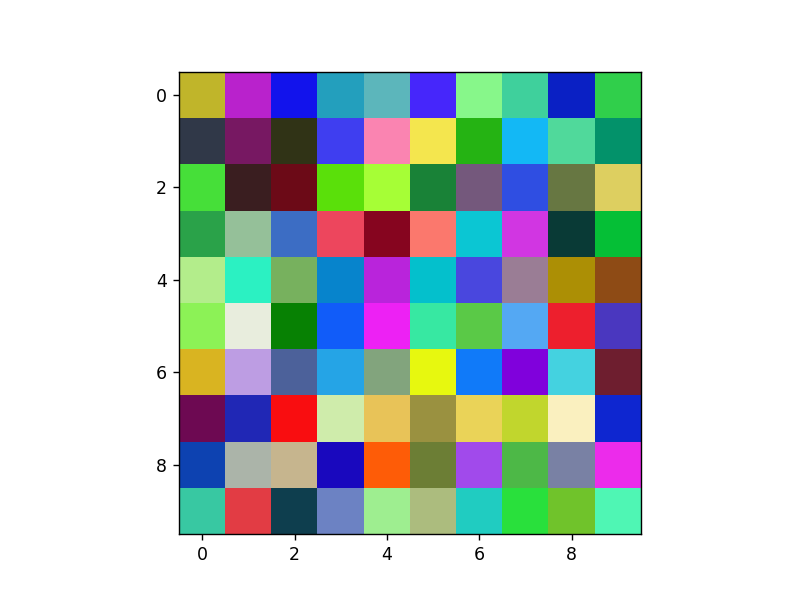

In [15]:
plt.figure()
plt.imshow(im)
plt.show()

<IPython.core.display.Javascript object>


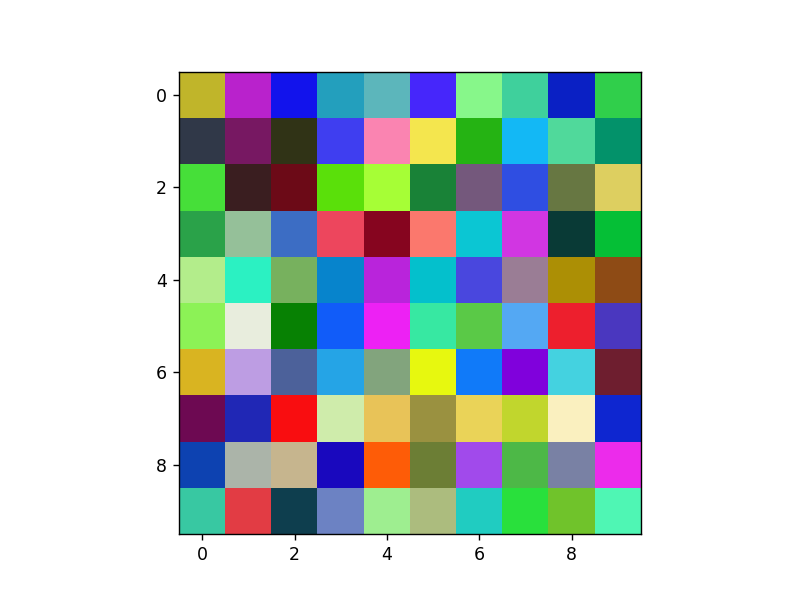

In [15]:
plt.figure()
plt.imshow(im)
plt.show()

## 4.1 Pinhole Camera Model

Assume look-vector is $\bm{w}$, up-vector is $\bm{v}$, then the right-hand vector $\bm{u}$ can be hold by:
$$
    \bm{u}= \frac{\bm{w}\times \bm{v} }{ \left \lvert \bm{w}\times \bm{v} \right \rvert}.
$$

Let $\bm{p}$ denote the camera's position, then the basis transformation matrix shall be:
$$
    \left[
        \begin{matrix}
             u_1 & u_1 & u_1 & 0\\
             v_2 & v_2 & v_2 & 0\\
             w_3 & w_3 & w_3 & 0\\
        \end{matrix}
    \right]
    \left[
        \begin{matrix}
            1 & 0 & 0 & -p_1\\
            0  & 1 & 0 & -p_2\\
            0 & 0 & 1 & -p_3\\
            0& 0& 0& 1
        \end{matrix}
    \right]=\bm{RT}.
$$

For projection from 3D space to 2D space, we need the perspective projection matrix $\bm{K}$:
$$
    \bm{K}=
    \left[
        \begin{matrix}
            \alpha f & s & c_x\\
            0 & -f & c_y\\
            0 & 0 & 1
        \end{matrix}
    \right],
$$

$\alpha$ is the aspect-ratio, $f$ is the focal length, $s$ is the shear ratio, $(c_x,c_y)$ is the focal center(principle point). For a homogeneous 3D-point $\bm{X}$, its corresponding homogeneous 2D-point $\bm{x}$ is:
$$
   z\bm{x}=\bm{P}\bm{X}=\bm{KRTX}=\bm{KR}(\bm{X}-\bm{p})=\bm{K}(\bm{RX}-\bm{Rp})=\bm{K}\left[ \bm{R}\, \lvert\, -\bm{RP} \right],
$$
where $z$ is the depth.

###  4.1.1 Constructing Rotation Matrix Using Power Series

#### 4.1.1.1 Rodrigue's Formula

if $\bm{v}$ is a vector in $\mathbb{R}^3$ and $\bm{k}$ is a unit vector describing an axis of rotating about which $\mathbf{v}$ rotates by angle $\theta$ according to right hand rules, the Rodrigues formula for the rotated vector $\bm{v}_{rot}$ is:
$$
    \bm{v}_{rot}=\bm{v}\cos(\theta) + (\bm{k}\times \bm{v}) \sin(\theta)+\bm{k} (\bm{k}\cdot \bm{v})(1-\cos(\theta))
$$

#### 4.1.1.2 Derivation

The vector $\bm{v}$ can be decomposed into components parallel and perpendicular to the axis $\bm{k}$:
$$
    \bm{v}=\bm{v}_\parallel +\bm{v}_\perp\\
    s.t.~~\bm{v}_\parallel=(\bm{v}\cdot\bm{k})\bm{k},
    \bm{v}_\perp=\bm{v}-\bm{v}_\parallel=-\bm{k}\times(\bm{k}\times \bm{v})
$$

$$
\bm{v}_{rot}=\bm{v}_\parallel +\cos(\theta) \bm{v}_\perp +\sin(\theta)\bm{k}\times\bm{v}
$$

Representing $\bm{v}$ and $\bm{k}\times\bm{v}$ as column matrices, the cross product can be expressed as matrix product:

$$
 \left[
     \begin{matrix}
          (\bm{k}\times\bm{v})_x\\
          (\bm{k}\times\bm{v})_y\\
          (\bm{k}\times\bm{v})_z\\
     \end{matrix}
 \right]
 =
 \left[
     \begin{matrix}
         k_yv_z-v_yk_z\\
         v_xk_z-k_xv_z\\
         k_xv_y-v_xk_y
     \end{matrix}
 \right]
 =
 \left[
     \begin{matrix}
         0&-k_z&k_y\\
         k_z&0&-k_x\\
         -k_y&k_x&0
     \end{matrix}
 \right]
 \left[
     \begin{matrix}
         v_x\\
         v_y\\
         v_z
     \end{matrix}
 \right]
 =\bm{Kv}
$$

Then the previous rotation formula in matrix language is therefore:
$$
    \begin{aligned}
        \bm{v}_{vot}
         &=\bm{v}-\bm{v}_\perp+\cos(\theta)\bm{v}_\perp+\sin(\theta)\bm{k}\times\bm{v}
         \\
         &=\bm{v}+(1-\cos(\theta))\bm{K}^2\bm{v}+\sin(\theta)\bm{Kv}
    \end{aligned}
$$

Factorizing the $\bm{v}$ allows compact expressoin:
$$
    \bm{v}_{rot}=\bm{Rv},
$$

where matrix $\bm{R}$ satisfies:
$$
    \bm{R}=\bm{I}+(1-\cos(\theta))\bm{K}^2+\sin(\theta)\bm{K}
$$

#### 4.1.1.2 Matrix Exponential:
$$
    e^\bm{A}=\sum_{k}\frac{1}{k!} \bm{A}^k
$$

Consider a skew-symmetric matrix:
$$
    \bm{S}=
    \theta\left[
        \begin{matrix}
            0 & a & b\\
            -a & 0 & c\\
            -b & -c & 0 
        \end{matrix}
    \right]
$$

The characteristic equation for $\bm{S}$ is:

$$
    \left\lvert \bm{S}-t\bm{I} \right\rvert
     =-t^3-t\theta^2(c^2+a^2+b^2)=-t^3-\theta^2t
$$

Subtitude $\bm{S}$ for $t$, we can obtain:
$$
    -\bm{S}^3-\theta^2\bm{S}=\bm{0},
$$

so that $\bm{S}^3=-\theta^2\bm{S}$. Higher power of $\bm{S}$ are $\bm{S}^4=-\theta^2\bm{S}^2,\bm{S}^5=-\theta^2\bm{S}^3=\theta^4\bm{S},\bm{S}^6=\theta^4\bm{S}$, and so on. Substuting there into power series for $\exp(\bm{A})$:

$$  
\begin{aligned}
     e^\bm{S}
     &=
     \bm{I}+\bm{S}+\frac{\bm{S}^2}{2!}+\frac{\bm{S}^3}{3!}+ \frac{\bm{S}^4}{4!}+ \frac{\bm{S}^5}{5!}+ \frac{\bm{S}^6}{6!} +\cdots
     \\
     &=\bm{I}+\bm{S}+\frac{1}{2!}\bm{S}^2-\frac{\theta^2}{3!}\bm{S}-\frac{\theta^2}{4!}\bm{S}^2
     +\frac{\theta^4}{5!}\bm{S}+\frac{\theta^4}{6!}\bm{S}^2
     \\
     &=\bm{I}+\frac{\sin\theta}{\theta}\bm{S}+\frac{1-\cos\theta}{\theta^2}\bm{S}^2
     \\
     &=\bm{I}+\sin(\theta)\hat{\bm{S}}+(1-\cos\theta)\hat{\bm{S}}^2,
\end{aligned}
$$

where $\hat{\bm{S}}=\frac{\bm{S}}{\theta}$, the above equation is the Rodrigue's formula for a rotation matrix. The angle of rotation is $\theta$ and the axis of rotation is $(-c,b,-a)$.

Thus for any axis of rotation $\bm{k}$, the rotation matrix about $\bm{k}$ can be obtained by:

$$
    e^\bm{S}=\exp(
    \theta'
    \left[
        \begin{matrix}
            0 & - \frac{k_z}{\lvert \bm{k} \rvert} & \frac{k_y}{\lvert \bm{k} \rvert} \\
            \frac{k_z}{\lvert \bm{k} \rvert} & 0 &-\frac{k_x}{\lvert \bm{k} \rvert}\\
            -\frac{k_y}{\lvert \bm{k} \rvert} & \frac{k_x}{\lvert \bm{k} \rvert} & 0 \\
        \end{matrix}
    \right])
$$

where the angle $theta'$ is $\theta'=s\cdot\theta\cdot\lvert \bm{k} \rvert$, and $s$ is the scale factor prescribed by user.

In [8]:
from scipy.linalg import expm,sinm,cosm

In [45]:
A = np.array([[0, 0, -1], [0, 1, 0], [1, 0, 0]])

In [69]:
expm(A)

array([[ 0.54030231,  0.        , -0.84147098],
       [ 0.        ,  2.71828183,  0.        ],
       [ 0.84147098,  0.        ,  0.54030231]])

In [3]:
class Camera:
    def __init__(self,P):
        self.P=P    # 投影矩阵
        self.K=None # 标定矩阵
        self.R=None # 旋转矩阵
        self.t=None # 平移
        self.c=None # 照相机中心
    
    def project(self,X):
        """
        Args:
            X (np.ndarray(float)[4,n])
        """
        x=self.P @ X # [3,n]
        x=x/x[2]
        
        return x

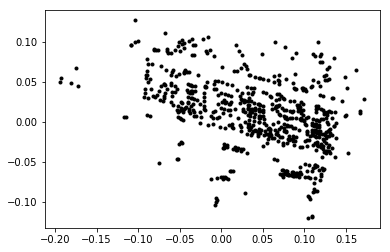

In [4]:
points = np.loadtxt('../data/house.p3d').T
points = np.vstack((points,np.ones(points.shape[1]))) # 设置照相机参数
P = np.hstack((np.eye(3),np.array([[0],[0],[-10]]))) 
cam = Camera(P) 
x = cam.project(points)
# 绘制投影 figure()
plt.figure()
plt.plot(x[0],x[1],'k.') 
plt.show()

In [6]:
def get_rotation(a):
    rot=np.eye(4)
    rot[:3,:3]=expm(np.array([[0,-a[2],a[1]],
                   [a[2],0,-a[0]],
                   [-a[1],a[0],0]]))
    return rot

In [6]:
r=.05*np.random.rand(3)
rot=get_rotation(r)

In [7]:
import time

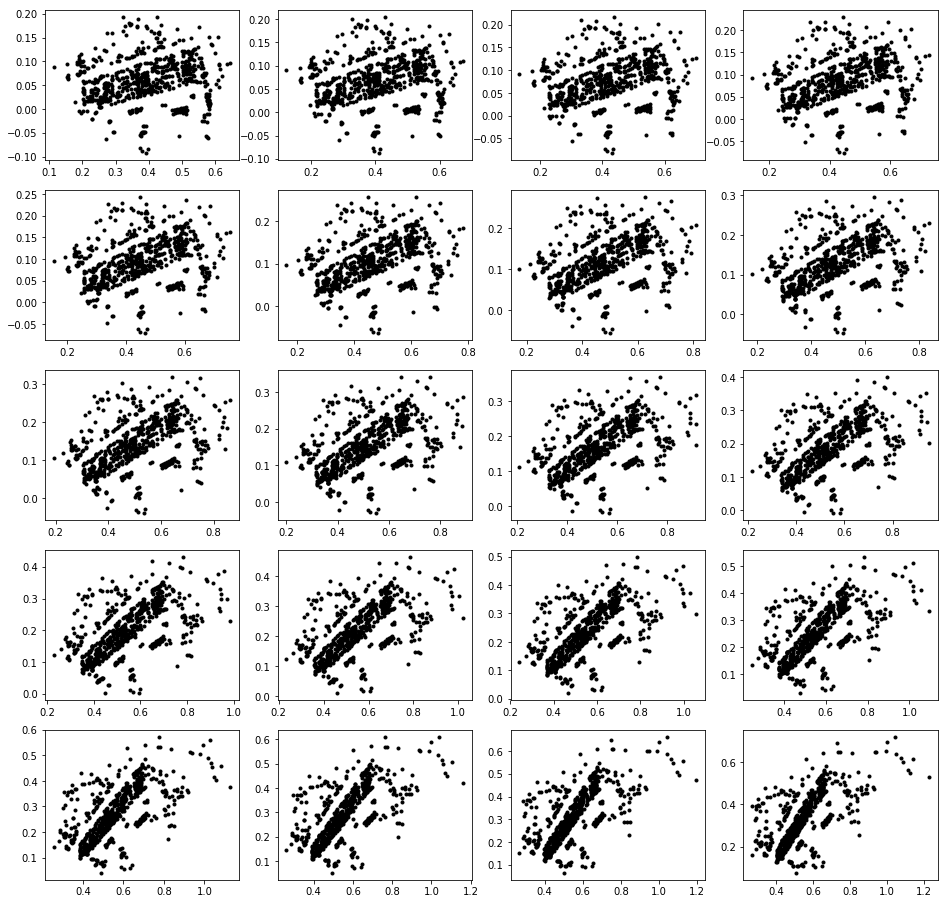

In [9]:
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(5,4,i+1)
    cam.P=cam.P @ rot
    x=cam.project(points)
    plt.plot(x[0],x[1],'k.')
plt.show()

### 4.1.3 Matrix Factorizing For Camera

#### 4.1.3.1 From Q-R Decomposition To R-Q Decomposition

Assume $\bm{P}=\left[ \begin{matrix} 0  &  \cdots & 0 &  1 \\ 0 & \cdots & 1 &  0 \\ \vdots & \vdots & \vdots& \vdots\\ 1 & \cdots & 0 & 0\end{matrix} \right]$, which is a permutation matrix.

Emmm..., substitute `\mathbf` for `\bm` since it's too ugly in jupyter...:
$$
    \bar{\mathbf{A}} = \mathbf{P} \mathbf{A},\bar{\mathbf{A}}^T=\bar{\mathbf{Q}}\bar{\mathbf{R} },
    \mathbf{Q}=\mathbf{P}\bar{\mathbf{Q}}^T,\mathbf{R}=\mathbf{P}\bar{\mathbf{R}}^T\mathbf{P}
    \Rightarrow 
    \mathbf{R}\mathbf{Q}=\mathbf{P}\bar{\mathbf{R}}^T\mathbf{P}\mathbf{P}\bar{\mathbf{Q}}^T
    =\mathbf{P}\bar{\mathbf{R}}^T\bar{\mathbf{Q}}^T
    =\mathbf{P}(\bar{\mathbf{Q}}\bar{\mathbf{R}})^T
    =\mathbf{P}\bar{\mathbf{A}}
    =\mathbf{P}\mathbf{P} \mathbf{A}=\mathbf{A}
$$

In [3]:
import scipy

In [4]:
class Camera:
    def __init__(self,P):
        self.P=P    # 投影矩阵
        self.K=None # 标定矩阵
        self.R=None # 旋转矩阵
        self.t=None # 平移
        self.c=None # 照相机中心
        
    def project(self,X):
        """
        Args:
            X (np.ndarray(float)[4,n])
        """
        x=self.P @ X # [3,n]
        x=x/x[2]
        
        return x

    def factor(self):
        """
        P=K[R | t]=[KR | Kt]
        """
        # 1. rq decomposition
        
        # use qr to get rq
        R,K=np.linalg.qr( np.flipud(self.P[:,:3]).T)
        R=np.flipud(R.T)
        K=np.fliplr(np.flipud(K.T))
        
        # use scipy interface
        #K,R = scipy.linalg.rq(self.P[:,:3])
        
        # 2. guarantee the sign of the inner parameter matrix since the result of the qr decomposition is not unique.
        T=np.diag(np.sign(np.diag(K)))
        
        if np.linalg.det(T)>0:
            T[1,1]*=-1
        
        # 3. get k
        K = K @ T
        
        # 4. get R , TT=I
        R =T @ R
        
        # 5. get t
        t = np.linalg.inv(K) @ self.P[:,3]
        
        self.K=K
        self.R=R
        self.t=t
        
        return K,R,t
    
    def center(self):
        if self.c is not None:
            return self.c
        self.c=-self.R.T@self.t
        return self.c

In [9]:
K = np.array([[1000,0,500],[0,-1000,300],[0,0,1]])
tmp = get_rotation([0,0,1])[:3,:3]
Rt = np.hstack((tmp,np.array([[50],[40],[30]])))
cam = Camera(K@Rt)
print(K)
print("--------------------------------------------------------")
print(Rt)
print("****************************************************************************")
pK,pR,pt=cam.factor()
print("--------------------------------------------------------")
print(pK)
print("--------------------------------------------------------")
print(pR)
print("--------------------------------------------------------")
print(pt)

[[ 1000     0   500]
 [    0 -1000   300]
 [    0     0     1]]
--------------------------------------------------------
[[ 0.54030231 -0.84147098  0.         50.        ]
 [ 0.84147098  0.54030231  0.         40.        ]
 [ 0.          0.          1.         30.        ]]
****************************************************************************
--------------------------------------------------------
[[ 1000.     0.   500.]
 [    0. -1000.   300.]
 [    0.     0.     1.]]
--------------------------------------------------------
[[ 0.54030231 -0.84147098  0.        ]
 [ 0.84147098  0.54030231  0.        ]
 [ 0.          0.          1.        ]]
--------------------------------------------------------
[50. 40. 30.]


### 4.1.4 Computing The Camer Center

$$
    \mathbf{P}\mathbf{C}=\mathbf{K}[\mathbf{R}\,\vert \,-\mathbf{RC}]\mathbf{C}=\mathbf{0}=\mathbf{K}[\mathbf{R}\,\vert \, \mathbf{t} ]
    \mathbf{C}=\mathbf{KRC}+\mathbf{Kt}
    \Rightarrow 
    \mathbf{C}=-\mathbf{R}^T\mathbf{t}
$$

## 4.2 Camera Calibration

$$
f_x=\frac{dx}{dX}dZ, f_y=\frac{dy}{dY}dZ
$$

In [10]:
def my_calibration(sz):
    row,col = sz
    fx = 2555*col/2592
    fy = 2586*row/1936
    K = np.diag([fx,fy,1])
    K[0,2] = 0.5*col
    K[1,2] = 0.5*row
    return K

## 4.3 Pose Estimation From Planes and Markers

In [11]:
from PIL import Image

In [12]:
im_front=np.array(Image.open('../data/book_frontal.JPG'))

In [13]:
im_perspective=np.array(Image.open('../data/book_perspective.JPG'))

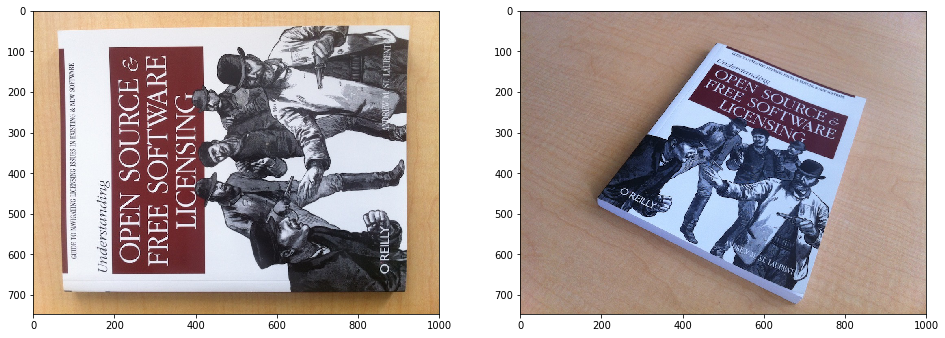

In [14]:
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(im_front)
plt.subplot(1,2,2)
plt.imshow(im_perspective)
plt.show()

In [15]:
def homo_dlt(fp,tp):
    """
    Direct Linear Transformation
    Args:
        fp (np.ndarray(float) [3,n]): from points with homogeneous coordinate.
        tp (np.ndarray(float) [3,n]): target points with homogeneous coordinate.
    Return:
        h (np.ndarray(float) [3,3]): homography matrix from fp to tp.
    """
    assert fp.shape == tp.shape
    _,num=fp.shape
    # 1. normalization
    m1=fp[:2].mean(axis=1)
    d1=fp[:2].std(axis=1)
    n1=np.diag([1/d1[0],1/d1[1],1])
    n1[:2,2]=-m1/d1
    fp=n1 @ fp
    
    m2=tp[:2].mean(axis=1)
    d2=tp[:2].std(axis=1)
    n2=np.diag([1/d2[0],1/d2[1],1])
    n2[:2,2]=-m2/d2
    tp=n2 @ tp
    
    # 2. DLT
    pad0=np.zeros([num,1])
    w=np.concatenate([pad0,
                      -tp[2][:,None],
                      tp[1][:,None],
                      tp[2][:,None],
                      pad0,
                      -tp[0][:,None] 
                     ],axis=1).reshape(-1,2,3)[...,None] # [n,2,3,1]
    fp=fp.T[:,None,None] # [n,1,1,3]
    X=w*fp # [n,2,3,3]
    X=X.reshape(-1,9) # [2n,9]
    u,s,v=np.linalg.svd(X)
    h=v[-1].reshape(3,3) 
    
    # 3. denomalization
    h=np.linalg.inv(n2) @ h @ n1
#     print(h[2,2])
    h/=h[2,2]
    return h

In [16]:
def affine_homo(fp,tp):
    """
    Affine homography
    Args:
        fp (np.ndarray(float) [3,n]): from points with homogeneous coordinate.
        tp (np.ndarray(float) [3,n]): target points with homogeneous coordinate.
    Return:
        h (np.ndarray(float) [3,3]): homography matrix from fp to tp.
    """
    assert fp.shape == tp.shape
    _,num=fp.shape
    # 1. normalization
    m1=fp[:2].mean(axis=1)
    d1=fp[:2].std(axis=1)
    n1=np.diag([1/d1[0],1/d1[1],1])
    n1[:2,2]=-m1/d1
    fp=n1 @ fp
    
    m2=tp[:2].mean(axis=1)
    n2=np.diag([1/d1[0],1/d1[1],1]) # same scale
    n2[:2,2]=-m2/d1
    tp=n2 @ tp
    
    # 2. DLT
    P=np.concatenate([ fp[:2].T ,tp[:2].T],axis=1) # [n,4]
    u,s,v=np.linalg.svd(P)
    v1v2=v[:2].T
    B=v1v2[:2]
    C=v1v2[2:]
    h2x2=C @ np.linalg.inv(B)
    h=np.zeros((3,3))
    h[:2,:2]=h2x2
    h[2,2]=1
    
    # 3. denomalization
    h=np.linalg.inv(n2) @ h @ n1
#     print(h[2,2])
    h/=h[2,2]
    return h

In [17]:
def sift_match_once(desp1,desp2):
    """
    Match the best similar points from desp2.
    Args:
        desp1 (np.ndarray(float)[n1,128])
        desp2 (np.ndarray(float)[n2,128])
    Return:
        idx (np.ndarray(int)[n1])
    """
    # 1. normalize to unit vector
    f1=desp1/(np.linalg.norm(desp1,axis=1)[:,None])
    f2=desp2/(np.linalg.norm(desp2,axis=1)[:,None])
    
    cos_sim=f1@f2.T
    ang_dis=np.arccos(cos_sim)
    ang_idx=ang_dis.argsort()
    
    # 2. use ratio ssd to alleviate the ambiguous pair points
    dis_ratio=.6
    i1,i2=ang_dis[range(len(ang_dis)),ang_idx[:,0]],ang_dis[range(len(ang_dis)),ang_idx[:,1]]
    dis_mask=i1< i2*dis_ratio
    idx=np.full(dis_mask.shape,-1)
    idx[dis_mask]=ang_idx[:,0][dis_mask]
    
    return idx

In [18]:
def sift_match(p1,p2,desp1,desp2):
    """
    Two side SIFT match.
    Args:
        p1 (np.ndarray(float)[n1,2])
        p2 (np.ndarray(float)[n2,2])
        desp1 (np.ndarray(float)[n1,128])
        desp2 (np.ndarray(float)[n2,128])
    Return:
        match_point(np.ndarray(int)[n',4]): format is `x1y1x2y2`
    """
    idx1=sift_match_once(desp1,desp2) # [n1]
    idx2=sift_match_once(desp2,desp1) # [n2]
    
    map_idx1=np.full((len(idx2)+1),-2)
    map_idx1[idx1]=range(len(idx1))
    map_idx1=map_idx1[:len(map_idx1)-1]
    same_mask=map_idx1==idx2
    
#     print(same_mask)
    re_p2=p2[same_mask] # [n',2]
    re_p1=p1[idx2[same_mask]]
    
    return np.concatenate([re_p1,re_p2],axis=1) # [n',4]

In [19]:
class HModel:
    
    def __init__(self):
        pass
    
    def fit(self,data):
        """
        Args:
            data (np.ndarray(float)[n',3+3]): n' here is 4, the coordinate is homogeneous
        Return:
            h (np.ndarray(float)[3,3]): homography matrix
        """
        data=data.T
        fp=data[:3,:4]
        tp=data[3:,:4]
        
        return homo_dlt(fp,tp)
    
    def get_error( self, data, model):
        """
        Erorrs corresponding each point
        """
        data=data.T
        fp=data[:3]
        tp=data[3:]
        fp_=model @ fp
        fp_=fp_/fp_[2][None]
        
        errors=np.sqrt(((fp_-tp)**2).sum(axis=0))
#         print(errors)
        return errors

In [20]:
import ransac
import cv2

In [21]:
sift = cv2.xfeatures2d.SIFT_create()
# p1,des1 = sift.detectAndCompute(im1,None)
pt_list=[]
desc_list=[]

for im in [im_front,im_perspective]:
    p1,des1=sift.detectAndCompute(im,None)
    pt_list+=[np.array([_.pt for _ in p1 ])]
    desc_list+=[des1]

In [22]:
match_pt_list=[]
for i,j in [[0,1]]:
    match_pt_list+=[sift_match(pt_list[i],pt_list[j],desc_list[i],desc_list[j])]

In [23]:
match_01=match_pt_list[0]
# match_01=np.hstack((match_01[:,[3,2]] , np.ones([len(match_01),1]),match_01[:,[1,0]],np.ones([len(match_01),1]) ) )
match_01=np.hstack((match_01[:,[0,1]] , np.ones([len(match_01),1]),match_01[:,[2,3]],np.ones([len(match_01),1]) ) )

In [24]:
h_model=HModel()

In [25]:
h01=ransac.ransac(match_01,h_model,4,1000,10,10,return_all=True)[0]

In [26]:
def cube_points(c,wid):
    p = []
    # bottom
    p.append([c[0]-wid,c[1]-wid,c[2]-wid])
    p.append([c[0]-wid,c[1]+wid,c[2]-wid])
    p.append([c[0]+wid,c[1]+wid,c[2]-wid])
    p.append([c[0]+wid,c[1]-wid,c[2]-wid])
    p.append([c[0]-wid,c[1]-wid,c[2]-wid]) # same as first to close plot
    # top
    p.append([c[0]-wid,c[1]-wid,c[2]+wid])
    p.append([c[0]-wid,c[1]+wid,c[2]+wid])
    p.append([c[0]+wid,c[1]+wid,c[2]+wid])
    p.append([c[0]+wid,c[1]-wid,c[2]+wid])
    p.append([c[0]-wid,c[1]-wid,c[2]+wid]) # same as first to close plot
    # vertical sides
    p.append([c[0]-wid,c[1]-wid,c[2]+wid])
    p.append([c[0]-wid,c[1]+wid,c[2]+wid])
    p.append([c[0]-wid,c[1]+wid,c[2]-wid])
    p.append([c[0]+wid,c[1]+wid,c[2]-wid])
    p.append([c[0]+wid,c[1]+wid,c[2]+wid])
    p.append([c[0]+wid,c[1]-wid,c[2]+wid])
    p.append([c[0]+wid,c[1]-wid,c[2]-wid])
    return np.array(p).T

In [27]:
# camera calibration
K = my_calibration((747,1000))
box = cube_points([0,0,0.1],0.1)

In [28]:
cam1=Camera(np.hstack((K,K@ [[0],[0],[-1]] )))

In [29]:
def make_homog(p):
    d,n=p.shape
    res=np.ones((d+1,n) )
    res[:d]=p
    return res

In [30]:
box_cam1=cam1.project(make_homog(box[:,:5]))

In [31]:
box_trans=h01 @ box_cam1
box_trans=box_trans/box_trans[-1][None]

In [32]:
# compute second camera matrix
cam2=Camera(h01 @ cam1.P)
print(cam2.P)

[[-4.19275175e+02 -5.05886713e+02  4.88393049e+02 -4.88393049e+02]
 [ 3.05194375e+02 -2.16097118e+02  2.87434902e+02 -2.87434902e+02]
 [-3.39064534e-01  1.07222385e-01  8.68148501e-01 -8.68148501e-01]]


In [33]:
A=np.linalg.inv(K)@cam2.P[:3,:3]
# since 1st 2nd, 4th columns are right, but 3rd column is arbitrary, recompute the third column.
A=np.vstack((A[:,0],A[:,1],np.cross(A[:,0],A[:,1]))).T
cam2.P[:3,:3]= K @  A
print(cam2.P)
box_cam2=cam2.project(make_homog(box))

[[-4.19275175e+02 -5.05886713e+02  1.15288325e+02 -4.88393049e+02]
 [ 3.05194375e+02 -2.16097118e+02  3.35178479e+02 -2.87434902e+02]
 [-3.39064534e-01  1.07222385e-01  3.10689652e-01 -8.68148501e-01]]


In [47]:
import torch as th

In [49]:
th.save(K,'K.pth')
th.save(Rt,'Rt.pth')

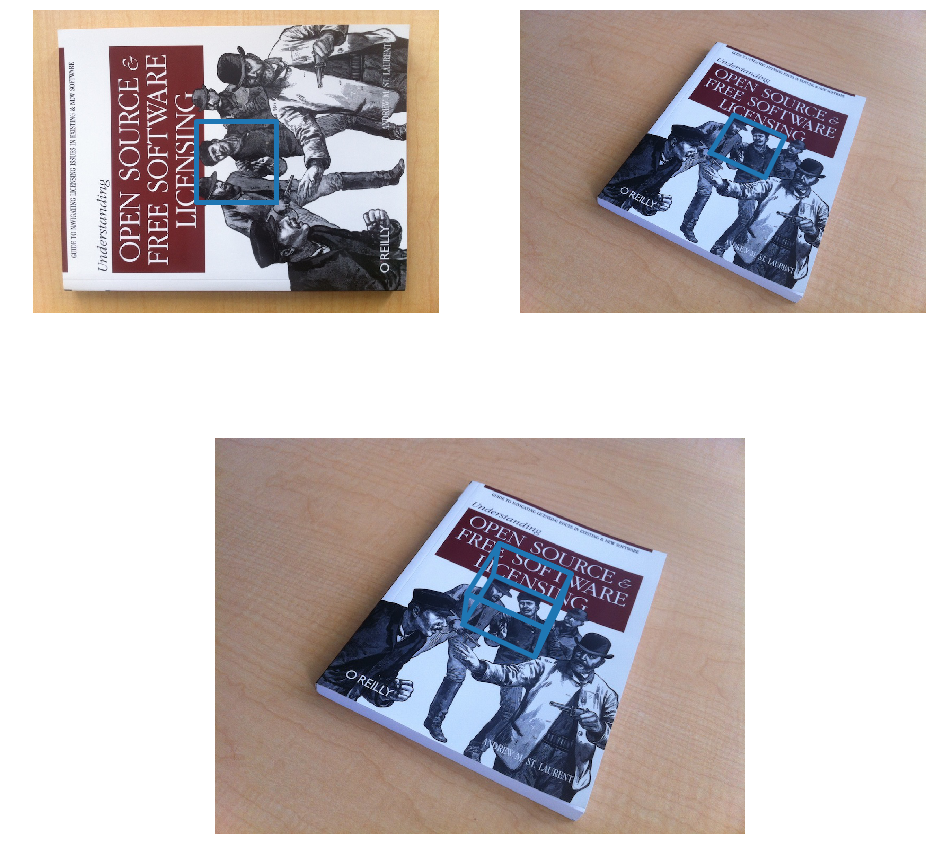

In [34]:
plt.figure(figsize=(16,16))

plt.subplot2grid((2, 2), (0, 0), colspan=1)
plt.imshow(im_front)
plt.axis('off')
plt.plot(box_cam1[0],box_cam1[1],linewidth=5)

plt.subplot2grid((2, 2), (0, 1), colspan=1)
plt.imshow(im_perspective)
plt.axis('off')
plt.plot(box_trans[0],box_trans[1],linewidth=5)

plt.subplot2grid((2, 2), (1, 0), colspan=2)
plt.imshow(im_perspective)
plt.axis('off')
plt.plot(box_cam2[0],box_cam2[1],linewidth=5)
plt.show()

## 4.4 Augmented Reality

In [35]:
from OpenGL.GL import *
from OpenGL.GLU import *
from OpenGL.GLUT import *
import pygame,pygame.image
from pygame.locals import *

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [36]:
def set_projection_from_camera(K):
    """ Set view from a camera calibration matrix. """
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    fx = K[0,0]
    fy = K[1,1]
    fovy = 2*np.arctan(0.5*height/fy)*180/np.pi
    aspect = (width*fy)/(height*fx) # why fy/fx?
    # define the near and far clipping planes
    near = 0.1
    far = 100.0
    # set perspective
    gluPerspective(fovy,aspect,near,far)
    glViewport(0,0,width,height)

In [37]:
def set_modelview_from_camera(Rt):
    """ Set the model view matrix from camera pose. """
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()
    # rotate teapot 90 deg around x-axis so that z-axis is up
    Rx = np.array([[1,0,0],[0,0,-1],[0,1,0]])
    # set rotation to best approximation
    R = Rt[:,:3]
    U,S,V = np.linalg.svd(R)
    R = U@V
    R[0,:] = -R[0,:] # change sign of x-axis
    # set translation
    t = Rt[:,3]
    # setup 4*4 model view matrix
    M = np.eye(4)
    M[:3,:3] = R @ Rx
    M[:3,3] = t
    # transpose and flatten to get column order
    M = M.T
    m = M.flatten()
    # replace model view with the new matrix
    glLoadMatrixf(m)

In [38]:
def draw_background(imname):
    """ Draw background image using a quad. """
    # load background image (should be .bmp) to OpenGL texture
    bg_image = pygame.image.load(imname).convert()
    bg_data = pygame.image.tostring(bg_image,"RGBX",1)
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    # bind the texture
    glEnable(GL_TEXTURE_2D)
    glBindTexture(GL_TEXTURE_2D,glGenTextures(1))
    glTexImage2D(GL_TEXTURE_2D,0,GL_RGBA,width,height,0,GL_RGBA,GL_UNSIGNED_BYTE,bg_data)
    glTexParameterf(GL_TEXTURE_2D,GL_TEXTURE_MAG_FILTER,GL_NEAREST)
    glTexParameterf(GL_TEXTURE_2D,GL_TEXTURE_MIN_FILTER,GL_NEAREST)
    # create quad to fill the whole window
    glBegin(GL_QUADS)
    glTexCoord2f(0.0,0.0); glVertex3f(-1.0,-1.0,-1.0)
    glTexCoord2f(1.0,0.0); glVertex3f( 1.0,-1.0,-1.0)
    glTexCoord2f(1.0,1.0); glVertex3f( 1.0, 1.0,-1.0)
    glTexCoord2f(0.0,1.0); glVertex3f(-1.0, 1.0,-1.0)
    glEnd()
    # clear the texture
    glDeleteTextures(1)

In [39]:
def draw_teapot(size):
    """ Draw a red teapot at the origin. """
    glEnable(GL_LIGHTING)
    glEnable(GL_LIGHT0)
    glEnable(GL_DEPTH_TEST)
    glClear(GL_DEPTH_BUFFER_BIT)
    # draw red teapot
    glMaterialfv(GL_FRONT,GL_AMBIENT,[0,0,0,0])
    glMaterialfv(GL_FRONT,GL_DIFFUSE,[0.5,0.0,0.0,0.0])
    glMaterialfv(GL_FRONT,GL_SPECULAR,[0.7,0.6,0.6,0.0])
    glMaterialf(GL_FRONT,GL_SHININESS,0.25*128.0)
    glutSolidTeapot(size)

In [40]:
# jupyter不支持opengl交互

In [1]:
def setup():
    """ Setup window and pygame environment. """
    pygame.init()
    pygame.display.set_mode((width,height),OPENGL | DOUBLEBUF)
    pygame.display.set_caption('OpenGL AR demo')

width,height = 1000,747
Rt=cam2.P
setup()
draw_background('../data/book_perspective.bmp')
set_projection_from_camera(K)
set_modelview_from_camera(Rt)
draw_teapot(0.02)
while True:
    event = pygame.event.poll()
    if event.type in (QUIT,KEYDOWN):
        break
    pygame.display.flip()

NameError: name 'cam2' is not defined

## Exercise

### 1. Modify the example code for the motion in Figure 4-2 to transform the points instead of the camera. You should get the same plot. Experiment with different transformations and plot the results.

### 2. Some of the Oxford multi-view datasets have camera matrices given. Compute the camera positions for one of the sets an plot the camera path. Does it match withwhat you are seeing in the images?

### 3. Take some images of a scene with a planar marker or object. Match features to a full-frontal image to compute the pose of each image’s camera location. Plot the camera trajectory and the plane of the marker. Add the feature points if you like.

### 4. In our augmented reality example, we assumed the object to be placed at the origin and applied only the camera’s position to the model view matrix. Modify the example to place several objects at different locations by adding the object transformation to the matrix. For example, place a grid of teapots on the marker.

### 5. Take a look at the online documentation for .obj model files and see how to use textured models. Find a model (or create your own) and add it to the scene.